In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex
from iexfinance.refdata import get_symbols

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [6]:
list_of_tickers = ["SPY", "AGG"]
# YOUR CODE HERE
end_date = datetime.now()
start_date = end_date + timedelta(-365)

df_port = get_historical_data(list_of_tickers, start_date, end_date, output_format='pandas')
df_port.head()

SPY                                        AGG                  \
              open    high     low   close     volume    open    high     low   
date                                                                            
2019-01-22  264.82  265.06  261.06  262.86  115531183  106.44  106.62  106.44   
2019-01-23  264.01  264.79  260.66  263.41   86030287  106.38  106.59  106.37   
2019-01-24  263.21  264.20  262.08  263.55   59204139  106.72  106.84  106.67   
2019-01-25  265.61  266.70  263.66  265.78   96883358  106.64  106.70  106.56   
2019-01-28  263.39  263.83  261.79  263.76   85613655  106.62  106.75  106.58   

                             
             close   volume  
date                         
2019-01-22  106.44  6823956  
2019-01-23  106.55  3222846  
2019-01-24  106.73  7308898  
2019-01-25  106.68  3469453  
2019-01-28  106.62  7365747

In [9]:
df_port.drop(columns=['open','high','low','volume'], level=1, inplace=True)

In [16]:
df_port

,SPY,AGG
,close,close
date,,
2019-01-22,262.86,106.44
2019-01-23,263.41,106.55
2019-01-24,263.55,106.73
2019-01-25,265.78,106.68
2019-01-28,263.76,106.62
...,...,...
2020-01-13,327.95,112.91
2020-01-14,327.45,113.01


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [18]:
# Calculate the daily roi for the stocks

daily_returns = df_port.pct_change()
daily_returns.head()

,SPY,AGG
,close,close
date,,
2019-01-22,NaN,NaN
2019-01-23,0.002092,0.001033
2019-01-24,0.000531,0.001689
2019-01-25,0.008461,-0.000468
2019-01-28,-0.007600,-0.000562


In [30]:
avg_daily_return_SPY = daily_returns.mean()['SPY']['close']
avg_daily_return_SPY

0.0009612642291769476

In [31]:
avg_daily_return_AGG = daily_returns.mean()['AGG']['close']
avg_daily_return_AGG

0.00024318932345666555

In [32]:
# Calculate volatility
# YOUR CODE HERE
std_dev_daily_return_SPY = daily_returns.std()['SPY']['close']
std_dev_daily_return_SPY

0.007401574798510325

In [33]:
std_dev_daily_return_AGG = daily_returns.std()['AGG']['close']
std_dev_daily_return_AGG

0.002084866830981002

In [34]:
# Save the last day's closing price
# YOUR CODE HERE
last_day_SPY=df_port['SPY']['close'][-1]
last_day_AGG=df_port['AGG']['close'][-1]

In [41]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()


In [42]:
# Run the Monte Carlo Simulation

for n in range(number_simulations):
    
    # YOUR CODE HERE
    simulated_SPY_prices = [last_day_SPY]
    simulated_AGG_prices = [last_day_AGG]

    # Simulate the returns for 252 * 3 days
    for i in range(number_records):
    
        # Calculate the simulated price using the last price within the list
        simulated_SPY_price = simulated_SPY_prices[-1] * (1 + np.random.normal(avg_daily_return_SPY, std_dev_daily_return_SPY))
        simulated_AGG_price = simulated_AGG_prices[-1] * (1 + np.random.normal(avg_daily_return_AGG, std_dev_daily_return_AGG))
        
        # Append the simulated price to the list
        simulated_SPY_prices.append(simulated_SPY_price)
        simulated_AGG_prices.append(simulated_AGG_price)
    
    # Append a simulated prices of each simulation to DataFrame
    simulated_price_df["SPY prices"] = pd.Series(simulated_SPY_prices)
    simulated_price_df["AGG prices"] = pd.Series(simulated_AGG_prices)
    
    # Calculate the daily returns of simulated prices
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # Set the portfolio weights (60% SPY; 40% AGG)
    weights = [0.60, 0.40]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994941,1.001613,1.002247,1.001520,0.993464,0.995628,1.008146,1.007650,0.993726,1.007882,...,1.005076,0.997936,0.999774,0.996816,1.005516,1.000216,0.996310,0.999220,1.002581,0.997321
2,0.995915,1.003000,0.996727,0.999300,0.993165,0.999441,1.000796,1.001833,0.987619,1.008830,...,1.006136,0.997984,1.007963,0.990284,1.004777,1.006433,1.000509,0.999316,1.005746,0.999154
3,0.992006,0.999078,1.000718,1.000956,0.991456,1.002272,1.003026,1.004349,0.981388,1.002083,...,1.009364,1.000487,1.005071,0.991715,1.003090,1.008850,0.999795,1.010427,1.005135,1.005661
4,0.983240,0.995344,0.999346,0.991609,0.995793,1.003419,1.000952,1.007298,0.978814,0.994319,...,1.016977,1.002570,1.000947,0.992480,1.015654,1.006044,1.002070,1.017087,1.011232,0.999097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,167.985197,191.374369,171.532344,200.323755,190.771593,111.855676,228.809399,123.549359,148.670547,268.043174,...,162.482395,133.058517,92.081574,73.423510,262.139972,203.449634,110.223669,150.951500,167.362738,236.875803
7557,168.441764,191.337287,170.020222,201.139240,190.684051,111.764652,229.805610,124.029303,148.183031,270.116381,...,163.664850,133.149668,91.966253,73.733485,261.641260,202.214198,109.864839,150.738968,167.329148,237.914759
7558,168.738578,191.441226,168.736890,199.592272,190.583875,111.639424,230.041059,124.157022,147.097201,270.295119,...,164.724101,133.648913,92.682747,73.796805,263.123795,202.542700,109.968071,150.186772,166.674483,239.305613
7559,169.777956,193.153960,168.696591,199.505032,191.736095,111.849423,229.311634,124.743471,147.665798,270.322280,...,165.492295,132.884357,92.795289,74.130802,263.168070,202.829837,110.887375,150.500004,167.090560,240.011029


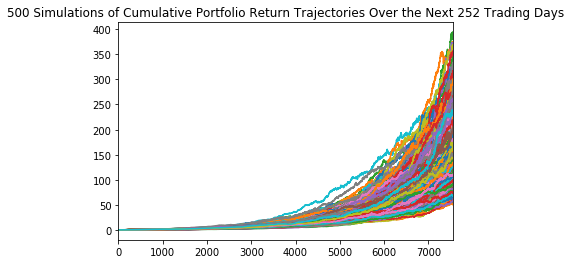

In [55]:
# Visualize the Simulation
# YOUR CODE HERE
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [56]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
ending_cumulative_returns_30yr = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns_30yr.head()

0    169.358259
1    192.919418
2    168.304695
3    200.216064
4    193.946650
Name: 7560, dtype: float64

In [57]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE
ending_cumulative_returns_20yr = portfolio_cumulative_returns.iloc[-(252*10), :]
ending_cumulative_returns_20yr.head()

0    33.747790
1    25.895325
2    28.648973
3    31.919018
4    25.503500
Name: 5041, dtype: float64

In [58]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE
# Use the `quantile` function to calculate the 90% confidence interval
confidence_interval = ending_cumulative_returns_30yr.quantile(q=[0.1, 0.9])
confidence_interval

0.1     92.78248
0.9    236.34731
Name: 7560, dtype: float64

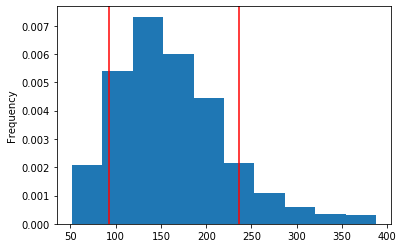

In [59]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
# with markings for a 90% confidence interval
plt.figure();
ending_cumulative_returns_30yr.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [67]:
# YOUR CODE HERE
confidence_interval2 = ending_cumulative_returns.quantile(q=[0.1, 0.5, 0.9])

cumulative_return_10 = confidence_interval2.iloc[0]
cumulative_return_50 = confidence_interval2.iloc[1]
cumulative_return_90 = confidence_interval2.iloc[2]


print(f"The expected cumulative returns at the 10th percentile is {cumulative_return_10}, at the 20th percentile is {cumulative_return_50},"      
      f" and at the 90th percentile is {cumulative_return_90}")


The expected cumulative returns at the 10th percentile is 18.767125289504552, at the 20th percentile is 28.320731523662637, and at the 90th percentile is 42.947508668808986


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [69]:
# YOUR CODE HERE
initial_investment = 20000

investment_pnl_10 = int(initial_investment * confidence_interval2.iloc[0])
investment_pnl_50 = int(initial_investment * confidence_interval2.iloc[1])
investment_pnl_90 = int(initial_investment * confidence_interval2.iloc[2])


print(f"Given a $20000 investment, the expected portfolio return at the 10th percentile is ${investment_pnl_10}, at the 20th percentile is ${investment_pnl_50},"      
      f" and at the 90th percentile is ${investment_pnl_90}")

Given a $20000 investment, the expected portfolio return at the 10th percentile is $375342, at the 20th percentile is $566414, and at the 90th percentile is $858950


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [ ]:
# YOUR CODE HERE



### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [ ]:
# YOUR CODE HERE

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE